Stiamo risolvendo :$$\mathbb{\dot{x}}(t) = \mathbb{f}( t, \mathbb{x}(t) )$$

$\mathbb{\dot{x}}(t)$ y $\mathbb{x}$ sono vettori.

In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
using PyPlot

In [3]:
function euler(t0, x0, h, N, f)
    t_attuale = t0
    x_attuale = x0

    ts = Float64[t_attuale]
    xs = Vector{Float64}[[x_attuale]]

    for i in 1:h:N
        push!(ts, t_attuale)
        push!(xs, x_attuale)

        t_nuova = t_attuale + h
        x_nuova = x_attuale + h*f(t_attuale, x_attuale)

        t_attuale = t_nuova
        x_attuale = x_nuova
    end
    #ts, hcat(xs...)'
    assi = hcat(xs...)'
    soluzione_x = assi[:, 1]
    soluzione_y = assi[:, 2]
    fig = figure("pyplot_subplot_mixed", figsize = (14, 7))
    subplot(131)
    plot(ts, soluzione_x)
    title("Soluzione x(t)")
    xlabel(L"t")
    ylabel(L"x(t)")
    subplot(132)
    title("Soluzione y(t)")
    xlabel(L"t")
    ylabel(L"y(t)")
    plot(ts, soluzione_y)
    subplot(133)
    title("Spazio delle fasi")
    plot(soluzione_x, soluzione_y)
    xlabel(L"x(t)")
    ylabel(L"y(t)")
    grid("on")
    
    
end

euler (generic function with 1 method)

**Esempio.** (in questo caso si tratta si un sistema autonomo, vuole dire che la $\mathbb{f}$ *solo* dipende del vettore $\mathbb{x}(t)$)

In [4]:
t0 = 0
x0 = [1, 1]
h = 0.25
N = 16

16

In [5]:
function esempio1(t, x0)
    x = x0[1]
    y = x0[2]
    return [y, -x + (1 - x^2)*y]
end

esempio1 (generic function with 1 method)

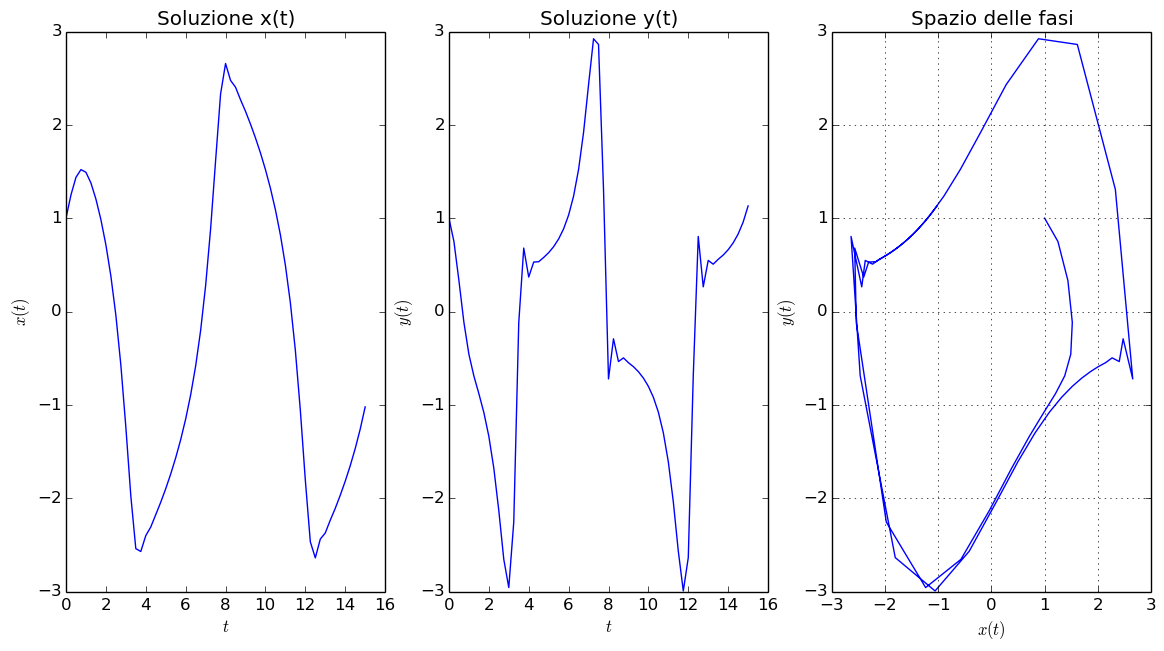

In [6]:
euler(t0, x0, h, N, esempio1)

**NOTA IMPORTANTE.**

Parlando veramente questo codigo codigo non è assai generale, questo si deve alla parte dove uso `PyPlot`. 

Una idea per migliorarlo sarebbe tagliare la parte di `PyPlot` e che il programma solo ritornasse ts, xs, ys, zs, etc (arrays) e poi noi prendiamo la decisione su che cosa fare con questi dati.

più o meno così:

In [7]:
function euler(t0, x0, h, N, f)
    t_attuale = t0
    x_attuale = x0

    ts = Float64[t_attuale]
    xs = Vector{Float64}[[x_attuale]]

    for i in 1:h:N
        push!(ts, t_attuale)
        push!(xs, x_attuale)

        t_nuova = t_attuale + h
        x_nuova = x_attuale + h*f(t_attuale, x_attuale)

        t_attuale = t_nuova
        x_attuale = x_nuova
    end    
    vettore_soluzione = hcat(xs...)'
    ts, vettore_soluzione
end

euler (generic function with 1 method)

usando lo stesso esempio :

In [8]:
tiempos, soluzione = euler(t0, x0, h, N, esempio1)
soluzione_x = soluzione[:, 1]
soluzione_z = soluzione[:, 2];